# County Components of Change Diagnostics

This analysis draws on ACS components of change 2000-2010 dataset for all counties, excluding AK and HI. For each county, I summed each component across all years to create variables named, e.g., 'TotNetMig' for total net migration.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
inFile = "/home/eric/Documents/franklin/github_public/temp/county_components.pkl"
df = pd.read_pickle(inFile)

In [3]:
df.head()

,pop2000,TotNPopChg,pop2010,TotDomMig,CO-POPEST2010,STNAME,CTYNAME,ESTIMATEBASE2000,countyfp,popchange,TotNetMig,TotNatInc,TotIntMig,statefp
01001,43671.0,7281.0,54571.0,5012.0,51032.0,Alabama,Autauga County,43751.0,001,0.25,5016.0,2519.0,4.0,01
01003,140415.0,43181.0,182265.0,36149.0,183597.0,Alabama,Baldwin County,140416.0,003,0.30,38359.0,4594.0,2210.0,01
01005,29038.0,570.0,27457.0,-2136.0,29612.0,Alabama,Barbour County,29042.0,005,-0.05,-1561.0,792.0,575.0,01
01007,19889.0,1536.0,22915.0,1112.0,21392.0,Alabama,Bibb County,19856.0,007,0.15,1182.0,458.0,70.0,01
01009,51022.0,7289.0,57322.0,4898.0,58271.0,Alabama,Blount County,50982.0,009,0.12,6021.0,1542.0,1123.0,01


## recode variables for  into binary categories
Create new binary fields for components of change having a default value of "NotLoss". Update fields based on net loss for each component. **Do we want to separate this analysis for shrinking and growing counties?** When I was looking just at shrinking counties, I coded binary fields for natural increase and net migration as "Loss" when they not only exhibited overall negative values but also overall numeric loss.

In [4]:
# overall population loss, drawing on decennial census data
df['NetPopChg'] = "NotLoss"
df.loc[df['pop2010'] < df['pop2000'], 'NetPopChg'] = "Loss"
# natural increase
df['NatIncCat'] = "NotLoss"
df.loc[(df['TotNatInc'] < 0), 'NatIncCat'] = "Loss"
# net migration
df['NetMigCat'] = "NotLoss"
df.loc[(df['TotNetMig'] < 0), 'NetMigCat'] = "Loss"
# net domestic migration
df['DomMigCat'] = "NotLoss"
df.loc[(df['TotDomMig'] < 0), 'DomMigCat'] = "Loss"
# net international migration
df['IntMigCat'] = "NotLoss"
df.loc[(df['TotIntMig'] < 0), 'IntMigCat'] = "Loss"

In [5]:
# Examine overall loss counts
pd.crosstab(index=df['NetPopChg'], columns='count')

col_0,count
NetPopChg,
Loss,1090
NotLoss,2019


## Domestic Migration

In [6]:
# cross overall numberic loss by net domestic migration
# overall loss in rows ('index'), loss through net domestic migration in columns
pd.crosstab(index=df['NetPopChg'], columns=df['DomMigCat'], margins=True)

DomMigCat,Loss,NotLoss,All
NetPopChg,,,
Loss,1024,66,1090
NotLoss,793,1226,2019
All,1817,1292,3109


In [7]:
# normalize by row, i.e, overall loss binary
pd.crosstab(index=df['NetPopChg'], columns=df['DomMigCat'], margins=True, normalize='index')

DomMigCat,Loss,NotLoss
NetPopChg,,
Loss,0.939450,0.060550
NotLoss,0.392769,0.607231
All,0.584432,0.415568


So 93% of loss counties lost through domestic migration. But 40% of the other counties also lost through net domestic outmigration. Let's check out the actual numbers here.

In [8]:
# What are the descriptive statistics for net domestic migration for growth and loss counties?
df.groupby('NetPopChg')['TotDomMig'].describe()

,count,mean,std,min,25%,50%,75%,max
NetPopChg,,,,,,,,
Loss,1090.0,-3479.850459,27262.445751,-752070.0,-1558.5,-758.0,-340.25,5442.0
NotLoss,2019.0,1902.108965,41402.755650,-1192169.0,-494.0,468.0,3311.00,421590.0


In [9]:
# which "growing" county lost so much through outmigration?
df.loc[(df['NetPopChg']=="NotLoss") & (df['TotDomMig'] < -10000)].sort_values('TotDomMig').head()

,pop2000,TotNPopChg,pop2010,TotDomMig,CO-POPEST2010,STNAME,CTYNAME,ESTIMATEBASE2000,countyfp,popchange,TotNetMig,TotNatInc,TotIntMig,statefp,NetPopChg,NatIncCat,NetMigCat,DomMigCat,IntMigCat
06037,9519331.0,361254.0,9818605.0,-1192169.0,9880569.0,California,Los Angeles County,9519315.0,037,0.03,-516557.0,924372.0,675612.0,06,NotLoss,NotLoss,Loss,Loss,NotLoss
36047,2465531.0,118963.0,2504700.0,-475634.0,2584652.0,New York,Kings County,2465689.0,047,0.02,-264112.0,235859.0,211522.0,36,NotLoss,NotLoss,Loss,Loss,NotLoss
36081,2229379.0,90383.0,2230722.0,-445964.0,2319777.0,New York,Queens County,2229394.0,081,0.00,-202086.0,158577.0,243878.0,36,NotLoss,NotLoss,Loss,Loss,NotLoss
12086,2253786.0,280427.0,2496435.0,-308078.0,2534220.0,Florida,Miami-Dade County,2253793.0,086,0.11,39149.0,149691.0,347227.0,12,NotLoss,NotLoss,NotLoss,Loss,NotLoss
48113,2218792.0,276294.0,2368139.0,-276057.0,2493102.0,Texas,Dallas County,2216808.0,113,0.07,-49687.0,301629.0,226370.0,48,NotLoss,NotLoss,Loss,Loss,NotLoss


In [10]:
# LA county lost the most through domestic outmigration. How did it fare for the other variables?
# massive natural increase and international migration to offset domestic outmigration
df.loc['06037']

pop2000                    9.51933e+06
TotNPopChg                      361254
pop2010                    9.81860e+06
TotDomMig                 -1.19217e+06
CO-POPEST2010              9.88057e+06
STNAME                      California
CTYNAME             Los Angeles County
ESTIMATEBASE2000           9.51932e+06
countyfp                           037
popchange                         0.03
TotNetMig                      -516557
TotNatInc                       924372
TotIntMig                       675612
statefp                             06
NetPopChg                      NotLoss
NatIncCat                      NotLoss
NetMigCat                         Loss
DomMigCat                         Loss
IntMigCat                      NotLoss
Name: 06037, dtype: object

## International Migration

In [11]:
# cross overall numberic loss by net international migration
pd.crosstab(index=df['NetPopChg'], columns=df['IntMigCat'], margins=True)

IntMigCat,Loss,NotLoss,All
NetPopChg,,,
Loss,104,986,1090
NotLoss,87,1932,2019
All,191,2918,3109


In [12]:
# row standardize table
pd.crosstab(index=df['NetPopChg'], columns=df['IntMigCat'], margins=True, normalize='index')

IntMigCat,Loss,NotLoss
NetPopChg,,
Loss,0.095413,0.904587
NotLoss,0.043091,0.956909
All,0.061435,0.938565


International migration tables show that loss and non-loss counties don't differ too much in terms of loss through international migration. Of course, they are certain to differ in terms of any *increases* experienced through this mechanism.

/home/eric/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


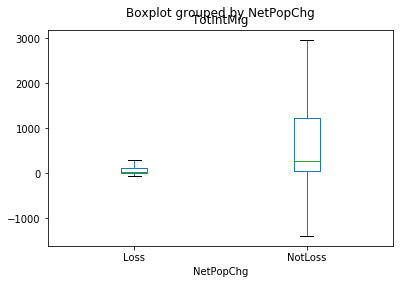

In [13]:
df.boxplot(column='TotIntMig', by='NetPopChg', grid=False, showfliers=False)

## Natural Increase

In [14]:
# cross overall numberic loss by natural increase/decrease
pd.crosstab(index=df['NetPopChg'], columns=df['NatIncCat'], margins=True)

NatIncCat,Loss,NotLoss,All
NetPopChg,,,
Loss,552,538,1090
NotLoss,320,1699,2019
All,872,2237,3109


In [17]:
# row standardize
pd.crosstab(index=df['NetPopChg'], columns=df['NatIncCat'], margins=True, normalize='index')

NatIncCat,Loss,NotLoss
NetPopChg,,
Loss,0.506422,0.493578
NotLoss,0.158494,0.841506
All,0.280476,0.719524


50% of loss counties experienced loss through natural decrease, while 16% of not-loss counties lost through natural decrease.

## Three Way Tables

I'm not which of many multi-dimensional tables we would want to show. 

* Almost all shrinking counties lost through migration, specifically domestic migration
* Very few counties of either type (loss, not-loss), lost population through international migration
* Loss counties are almost evenly split on loss through natural increase, while few not-loss counties loss through this mechanism

In [81]:
# 4-way table. columns represent, in order from highest down, natural increase, intntl migration, 
# and domestic migration
# rows remain overall loss/growth
crossed=pd.crosstab(index=df['NetPopChg'], columns=[df['NatIncCat'], df['IntMigCat'], df['DomMigCat']], margins=True)
crossed

NatIncCat Loss                         NotLoss                           All
IntMigCat Loss         NotLoss            Loss         NotLoss              
DomMigCat Loss NotLoss    Loss NotLoss    Loss NotLoss    Loss NotLoss      
NetPopChg                                                                   
Loss        59      10     437      46      35       0     493      10  1090
NotLoss      7      19      80     214      36      25     670     968  2019
All         66      29     517     260      71      25    1163     978  3109

In [82]:
# normalize values using total number of counties
crossed.div(crossed['All'], axis=0) * 100

NatIncCat      Loss                                   NotLoss            \
IntMigCat      Loss              NotLoss                 Loss             
DomMigCat      Loss   NotLoss       Loss    NotLoss      Loss   NotLoss   
NetPopChg                                                                 
Loss       5.412844  0.917431  40.091743   4.220183  3.211009  0.000000   
NotLoss    0.346706  0.941060   3.962358  10.599307  1.783061  1.238237   
All        2.122869  0.932776  16.629141   8.362818  2.283693  0.804117   

NatIncCat                          All  
IntMigCat    NotLoss                    
DomMigCat       Loss    NotLoss         
NetPopChg                               
Loss       45.229358   0.917431  100.0  
NotLoss    33.184745  47.944527  100.0  
All        37.407527  31.457060  100.0

* 40% of loss counties lost through natural increase AND Domestic Migration BUT NOT international migration
* 45% of loss counties lost though domestic migration ALONE
* 33% of growth counties lost through domestic migration ALONE